In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import yfinance as yf

In [3]:
start='2014-01-01'
end='2024-05-31'
stock='NVDA'

data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2014-01-02,0.373966,0.376796,0.370665,0.375381,260092000
2014-01-03,0.369486,0.375381,0.368307,0.374674,259332000
2014-01-06,0.374438,0.377267,0.369722,0.373259,409492000
2014-01-07,0.380568,0.381983,0.375617,0.378210,333288000
2014-01-08,0.385756,0.387642,0.380568,0.381983,308192000
...,...,...,...,...,...
2024-05-23,103.774452,106.294852,101.495984,102.003867,835065000
2024-05-24,106.443817,106.449812,102.975636,104.424291,429494000


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2014-01-02,0.373966,0.376796,0.370665,0.375381,260092000
1,2014-01-03,0.369486,0.375381,0.368307,0.374674,259332000
2,2014-01-06,0.374438,0.377267,0.369722,0.373259,409492000
3,2014-01-07,0.380568,0.381983,0.375617,0.378210,333288000
4,2014-01-08,0.385756,0.387642,0.380568,0.381983,308192000
...,...,...,...,...,...,...
2615,2024-05-23,103.774452,106.294852,101.495984,102.003867,835065000
2616,2024-05-24,106.443817,106.449812,102.975636,104.424291,429494000
2617,2024-05-28,113.874062,114.911818,109.857014,110.217929,652728000


In [7]:
ma_100_days=data.Close.rolling(9).mean()

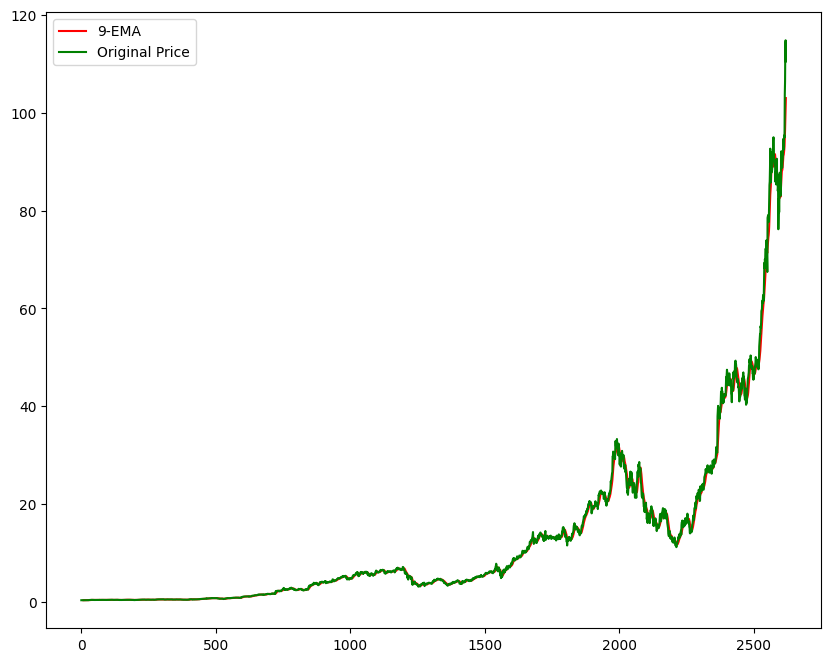

In [8]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days,'r', label='9-EMA')
plt.plot(data.Close,'g', label='Original Price')
plt.legend()
plt.show()

In [9]:
ma_200_days=data.Close.rolling(15).mean()

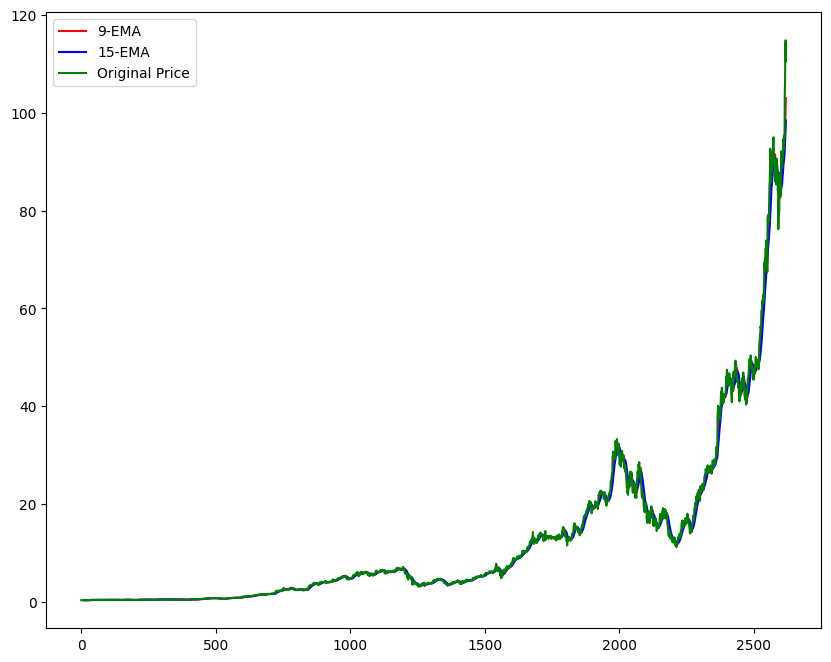

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days,'r',label='9-EMA')
plt.plot(ma_200_days,'b',label='15-EMA')
plt.plot(data.Close,'g',label='Original Price')
plt.legend()
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
data_train.shape[0],data_test.shape[0]

(2096, 524)

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]

for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x) ,np.array(y)

In [19]:
from keras.layers import Dense, Dropout, Input,LSTM
from keras.models import Sequential

In [20]:
model =Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0313
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0042
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0035
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0046
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0034
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0039
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0031
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0030
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0022
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0035
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0033
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0028
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0024
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0032
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days=data_train.tail(100)

In [25]:
data_test=pd.concat([pas_100_days,data_test], ignore_index=True)

In [26]:
data_test

Ticker,NVDA
0,29.987127
1,32.373158
2,31.773157
3,30.439377
4,30.147858
...,...
619,103.774452
620,106.443817
621,113.874062
622,114.797836


In [27]:
data_test_scale= scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]

for i in range (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [29]:
y_predict=model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [30]:
scale=1/scaler.scale_

In [31]:
y_predict=y_predict*scale

In [32]:
y=y*scale

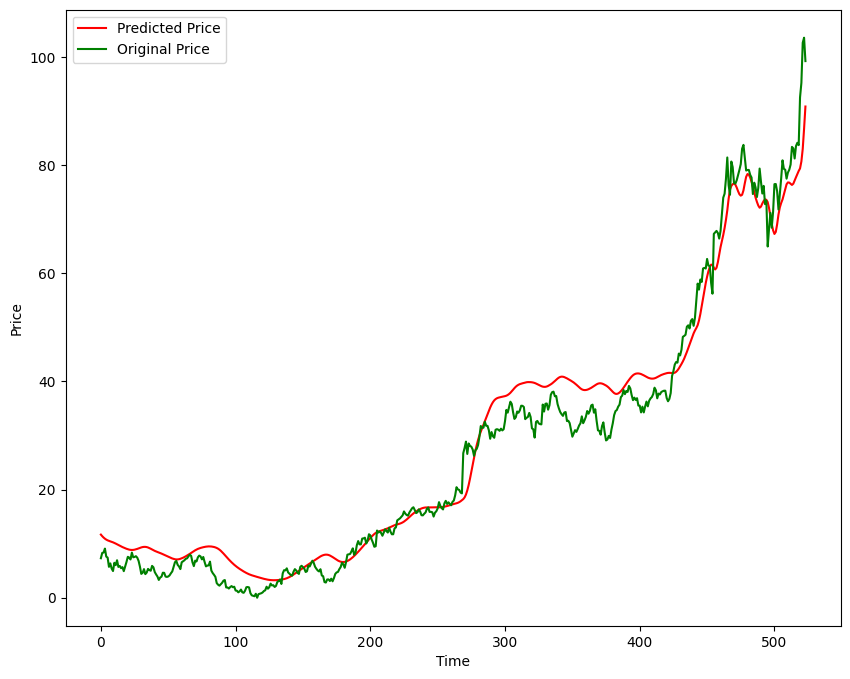

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y,'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from tensorflow.keras.models import load_model

model.save("lstm_model.h5")
